# Machine Learning Day 3 Lab 

**1.Jack is a car enthusiast and wants to buy a new car. He wants to find the best deal and decides to use machine learning to predict the prices of different car models.Jack collects data on various features such as the make, model, year, engine size, and number of doors, as well as the sale price of each car. He splits the data into a training set and a test set and trains a linear regression model on the training data.Car Price Prediction with Machine Learning**

a)	Read the dataset  using the Pandas module 

b)	print the 1st five rows. 

c)	Basic statistical computations on the data set or distribution of data

d)	the columns and their data types

e)	Detects null values in the dataset. If there is any null values replaced it with mode value

f)	Explore the data set using   heatmap

g)	Split the data in to test and train 

h)	Fit in to the model Naive Bayes Classifier

i)	Predict the model

j)	Find the accuracy of the model



First five rows of the dataset:
     make    model  year  engine_size  number_of_doors  sale_price
0  Toyota  Corolla  2010          1.8                4        7000
1   Honda    Civic  2011          2.0                4        8000
2    Ford    Focus  2012          2.0                4        6500
3     BMW      320  2013          3.0                4       15000
4    Audi       A4  2014          2.0                4       16000

Basic statistical computations:
              year  engine_size  number_of_doors    sale_price
count     5.000000     5.000000              5.0      5.000000
mean   2012.000000     2.160000              4.0  10500.000000
std       1.581139     0.477493              0.0   4609.772229
min    2010.000000     1.800000              4.0   6500.000000
25%    2011.000000     2.000000              4.0   7000.000000
50%    2012.000000     2.000000              4.0   8000.000000
75%    2013.000000     2.000000              4.0  15000.000000
max    2014.000000     3.0000

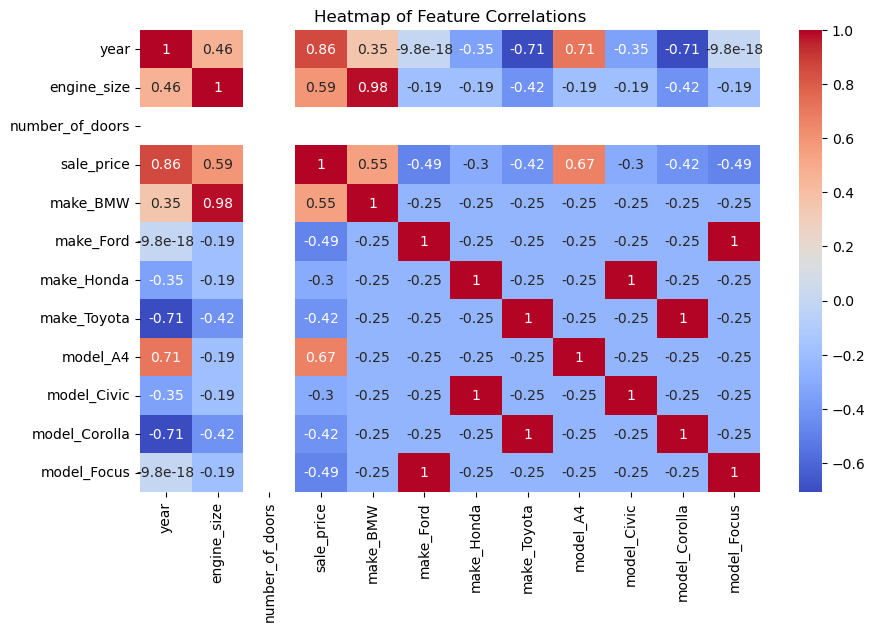


Accuracy of the model: 0.00


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Generating a sample dataset
data = {
    'make': ['Toyota', 'Honda', 'Ford', 'BMW', 'Audi'],
    'model': ['Corolla', 'Civic', 'Focus', '320', 'A4'],
    'year': [2010, 2011, 2012, 2013, 2014],
    'engine_size': [1.8, 2.0, 2.0, 3.0, 2.0],
    'number_of_doors': [4, 4, 4, 4, 4],
    'sale_price': [7000, 8000, 6500, 15000, 16000]
}
df = pd.DataFrame(data)

# a) Read the dataset (already in a DataFrame here)
# df = pd.read_csv('car_prices.csv') # Uncomment this line if using an actual CSV file

# b) Print the 1st five rows
print("First five rows of the dataset:")
print(df.head())

# c) Basic statistical computations on the dataset
print("\nBasic statistical computations:")
print(df.describe())

# d) The columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)

# e) Detect null values in the dataset
print("\nDetecting null values:")
print(df.isnull().sum())

# If there are any null values, replace them with the mode value
for column in df.columns:
    if df[column].isnull().sum() > 0:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

# Verifying null values are handled
print("\nNull values after handling:")
print(df.isnull().sum())

# Encoding categorical variables for the heatmap
df_encoded = pd.get_dummies(df, drop_first=True)

# f) Explore the dataset using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

# g) Split the data into test and train
X = df.drop('sale_price', axis=1)
# Encoding categorical variables for the model
X = pd.get_dummies(X, drop_first=True)
y = df['sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# h) Fit into the model Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# i) Predict the model
y_pred = model.predict(X_test)

# j) Find the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy:.2f}")

**2.Implement a Python program for  the most specific hypothesis using Find-S**


Origin	Manufacturer	Color	Decade	Type	Example Type

Japan	Honda	Blue	1980	Economy	Positive

Japan	Toyota	Green	1970	Sports	Negative

Japan	Toyota	Blue	1990	Economy	Positive

USA	   Chrysler	Red	    1980	Economy	Negative

Japan	Honda	White	1980	Economy	Positive







In [2]:
import pandas as pd

# Define the dataset
data = [
    ['Japan', 'Honda', 'Blue', '1980', 'Economy', 'Positive'],
    ['Japan', 'Toyota', 'Green', '1970', 'Sports', 'Negative'],
    ['Japan', 'Toyota', 'Blue', '1990', 'Economy', 'Positive'],
    ['USA', 'Chrysler', 'Red', '1980', 'Economy', 'Negative'],
    ['Japan', 'Honda', 'White', '1980', 'Economy', 'Positive']
]

columns = ['Origin', 'Manufacturer', 'Color', 'Decade', 'Type', 'Example_Type']
df = pd.DataFrame(data, columns=columns)

def find_s_algorithm(df):
    hypothesis = ['Ø'] * (len(df.columns) - 1)
    
    for i, row in df.iterrows():
        if row['Example_Type'] == 'Positive':
            hypothesis = row[:-1].tolist()
            break
    
    for i, row in df.iterrows():
        if row['Example_Type'] == 'Positive':
            for j in range(len(hypothesis)):
                if hypothesis[j] != row[j]:
                    hypothesis[j] = '?'
    
    return hypothesis

hypothesis = find_s_algorithm(df)
print("The most specific hypothesis is:", hypothesis)

The most specific hypothesis is: ['Japan', '?', '?', '?', 'Economy']


**3.Develop a Python code for implementing Polynomial regression and show its performance**

Training Mean Squared Error: 98.96
Testing Mean Squared Error: 91.16
Training R^2 Score: 0.96
Testing R^2 Score: 0.95


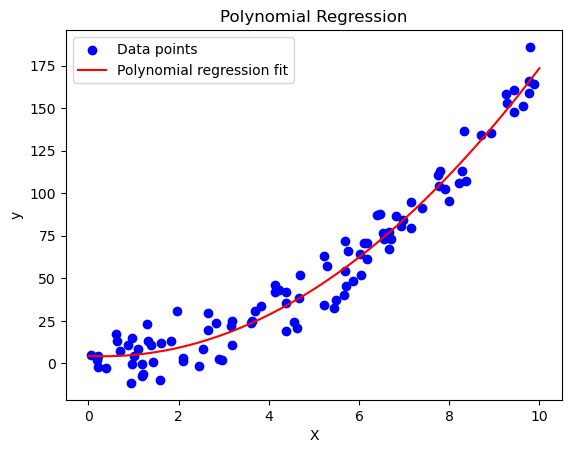

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generating a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Random values between 0 and 10
y = 2 * (X ** 2) - 3 * X + 5 + np.random.randn(100, 1) * 10  # Quadratic function with noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error: {mse_train:.2f}")
print(f"Testing Mean Squared Error: {mse_test:.2f}")
print(f"Training R^2 Score: {r2_train:.2f}")
print(f"Testing R^2 Score: {r2_test:.2f}")

plt.scatter(X, y, color='blue', label='Data points')
X_line = np.linspace(0, 10, 100).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = model.predict(X_line_poly)
plt.plot(X_line, y_line, color='red', label='Polynomial regression fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

**4.Develop a Python code for implementing the KNN algorithm with an example**

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


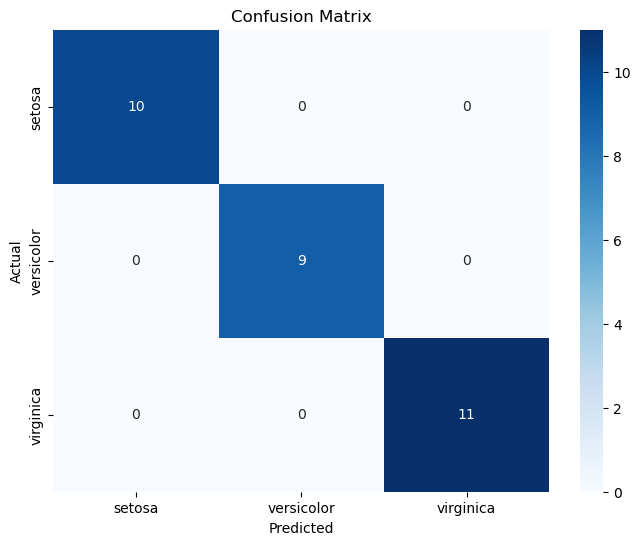

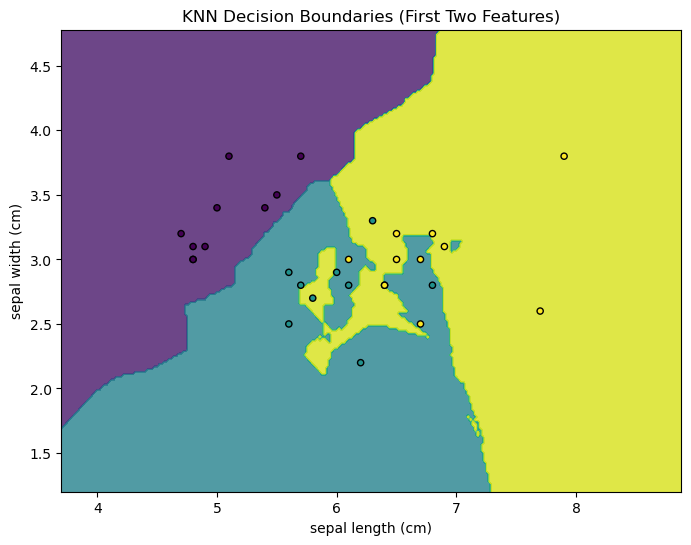

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris['target_names'], yticklabels=iris['target_names'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

def plot_decision_boundaries(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel(iris['feature_names'][0])
    plt.ylabel(iris['feature_names'][1])
    plt.show()

knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train[:, :2], y_train)

plot_decision_boundaries(X_test[:, :2], y_test, knn_vis, 'KNN Decision Boundaries (First Two Features)')

**5.John is a young professional who wants to buy his first home. He knows that his credit score is an important factor in determining whether he will be approved for a loan, so he decides to check it. He goes to a financial website that offers a free credit score prediction service based on machine learning algorithms.**
(a.)	Print the 1st five rows

( b.) Basic statistical computations on the data set or distribution of data

(c) The columns and their data types 

(d) Detects null values in the dataset. If there is any null values replaced it with mode value 

(e) Explore the data set using   ps.box(Credit Scores Based on Occupation) 

(f) Split the data in to test and train 

(g) Fit in to the model Naive Bayes Classifier 

(i) Predict the model


First five rows of the dataset:
   Age  Annual_Income  Credit_Card_Debt  Years_of_Credit_History  \
0   21          36521             17582                        5   
1   24         118162             19381                        8   
2   24          86894              5661                       14   
3   30         104659             15939                       11   
4   40          44254             10787                       15   

   Number_of_Credit_Inquiries Occupation  Credit_Score  
0                           7     Lawyer           390  
1                           8     Lawyer           368  
2                           6     Artist           822  
3                           4    Teacher           312  
4                           7     Lawyer           525  

Basic statistical computations:
              Age  Annual_Income  Credit_Card_Debt  Years_of_Credit_History  \
count  100.000000     100.000000        100.000000               100.000000   
mean    38.450000   75276.

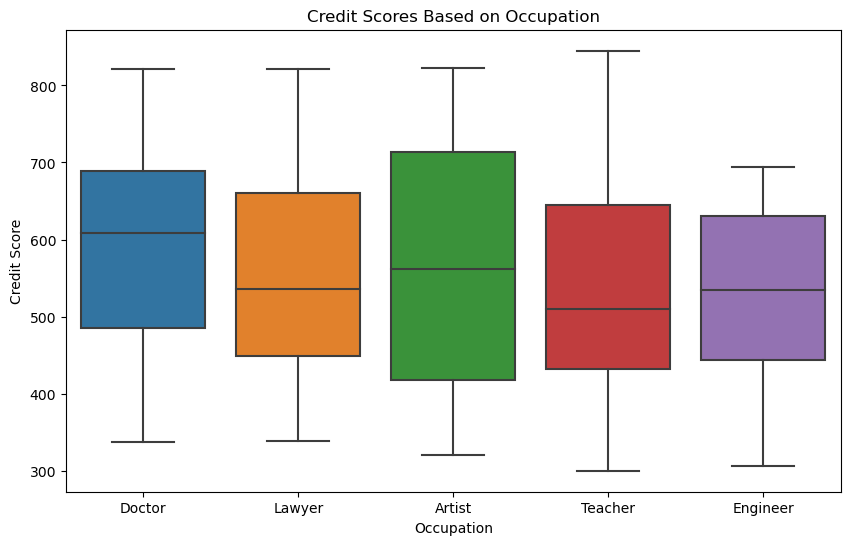


Mean Squared Error: 36144.55
R^2 Score: -1.13

Classification Accuracy: 0.60

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.30      0.75      0.43         4

    accuracy                           0.60        20
   macro avg       0.60      0.66      0.56        20
weighted avg       0.78      0.60      0.64        20


Confusion Matrix:
[[9 7]
 [1 3]]


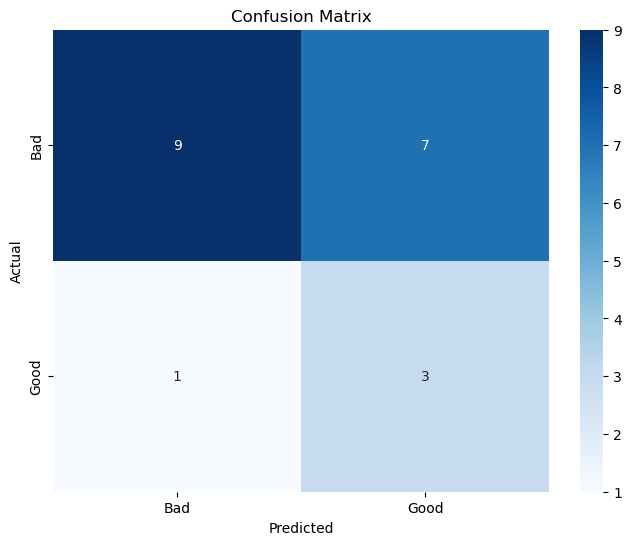

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generating a sample dataset
np.random.seed(0)
data = {
    'Age': np.random.randint(21, 60, 100),
    'Annual_Income': np.random.randint(30000, 120000, 100),
    'Credit_Card_Debt': np.random.randint(0, 20000, 100),
    'Years_of_Credit_History': np.random.randint(1, 20, 100),
    'Number_of_Credit_Inquiries': np.random.randint(0, 10, 100),
    'Occupation': np.random.choice(['Engineer', 'Doctor', 'Teacher', 'Artist', 'Lawyer'], 100),
    'Credit_Score': np.random.randint(300, 850, 100)
}
df = pd.DataFrame(data)

print("First five rows of the dataset:")
print(df.head())

print("\nBasic statistical computations:")
print(df.describe())

print("\nColumns and their data types:")
print(df.dtypes)

print("\nDetecting null values:")
print(df.isnull().sum())

df.loc[0, 'Occupation'] = np.nan

for column in df.columns:
    if df[column].isnull().sum() > 0:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

print("\nNull values after handling:")
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Credit_Score', data=df)
plt.title('Credit Scores Based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Credit Score')
plt.show()

X = df.drop('Credit_Score', axis=1)
X = pd.get_dummies(X, drop_first=True)  # Encoding categorical variable
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = np.mean((y_pred - y_test)**2)
print(f"\nMean Squared Error: {mse:.2f}")

r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
print(f"R^2 Score: {r2:.2f}")

y_test_class = (y_test >= 700).astype(int)  # Assume credit scores >= 700 are good
y_pred_class = (y_pred >= 700).astype(int)

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\nClassification Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**6.For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.**

Origin	Manufacturer	Color	Decade	Type	Example Type

Japan	Honda	Blue	1980	Economy	Positive

Japan	Toyota	Green	1970	Sports	Negative

Japan	Toyota	Blue	1990	Economy	Positive

USA	    ChryslerRed	    1980	Economy	Negative

Japan	Honda	White	1980	Economy	Positive


In [6]:
import pandas as pd
import numpy as np

data = {
    'Origin': ['Japan', 'Japan', 'Japan', 'USA', 'Japan'],
    'Manufacturer': ['Honda', 'Toyota', 'Toyota', 'Chrysler', 'Honda'],
    'Color': ['Blue', 'Green', 'Blue', 'Red', 'White'],
    'Decade': [1980, 1970, 1990, 1980, 1980],
    'Type': ['Economy', 'Sports', 'Economy', 'Economy', 'Economy'],
    'Example Type': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive']
}

df = pd.DataFrame(data)

def initialize_hypotheses(df):
    num_attributes = df.shape[1] - 1
    S = ['0'] * num_attributes  # Most specific hypothesis
    G = [['?'] * num_attributes]  # Most general hypothesis
    return S, G

def is_consistent(hypothesis, example):
    for h, e in zip(hypothesis, example):
        if h != '?' and h != e:
            return False
    return True

def candidate_elimination(df):
    S, G = initialize_hypotheses(df)
    for i, row in df.iterrows():
        example = row[:-1]
        label = row[-1]
        if label == 'Positive':
            G = [g for g in G if is_consistent(g, example)]
            for j in range(len(S)):
                if S[j] == '0':
                    S[j] = example[j]
                elif S[j] != example[j]:
                    S[j] = '?'
        elif label == 'Negative':
            new_G = []
            for g in G:
                for j in range(len(g)):
                    if g[j] == '?':
                        for value in df.iloc[:, j].unique():
                            if value != example[j]:
                                new_hypothesis = g.copy()
                                new_hypothesis[j] = value
                                if is_consistent(new_hypothesis, example):
                                    new_G.append(new_hypothesis)
            G = new_G
    return S, G

S, G = candidate_elimination(df)

print("Most Specific Hypothesis (S):", S)
print("Most General Hypothesis (G):", G)

Most Specific Hypothesis (S): ['Japan', '?', '?', '?', 'Economy']
Most General Hypothesis (G): []


**7.Develop a Python code for implementing Linear and Polynomial regression and show its performance**

Linear Regression Model Performance:
Mean Squared Error: 493.20
R^2 Score: 0.69

Polynomial Regression Model Performance:
Mean Squared Error: 8.73
R^2 Score: 0.99



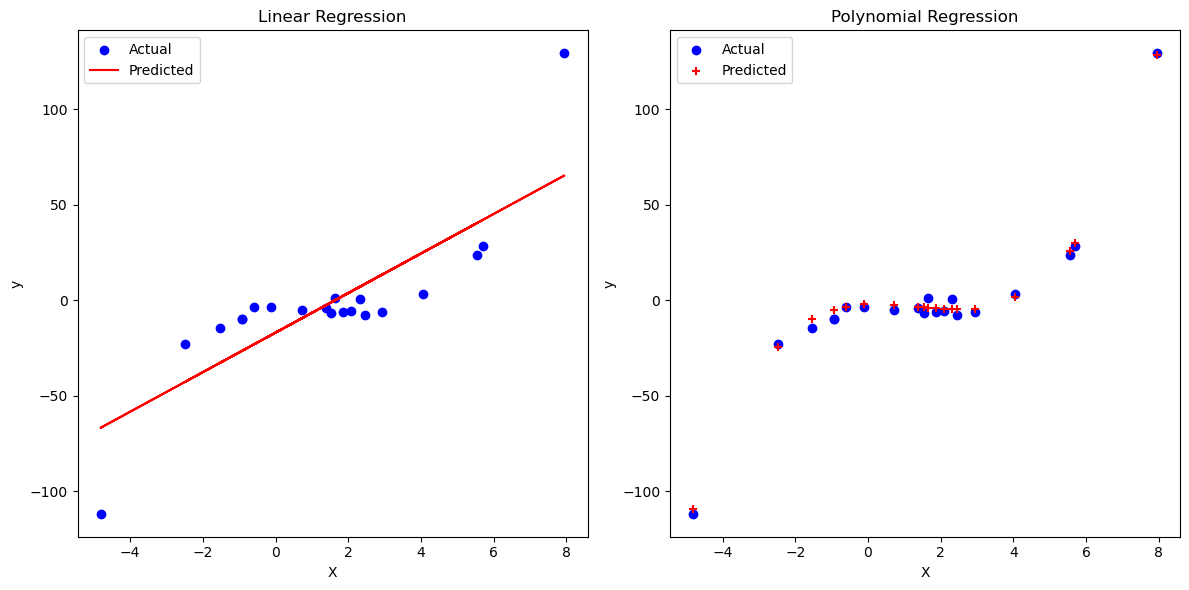

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 100)

X = X[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred_linear = linear_regressor.predict(X_test)

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

y_pred_poly = poly_regressor.predict(X_test_poly)

def evaluate_performance(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Model Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}\n")

evaluate_performance(y_test, y_pred_linear, "Linear Regression")
evaluate_performance(y_test, y_pred_poly, "Polynomial Regression")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicted', marker='+')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

**8.Develop a Python code for implementing the Expectation Maximization algorithm with and example**

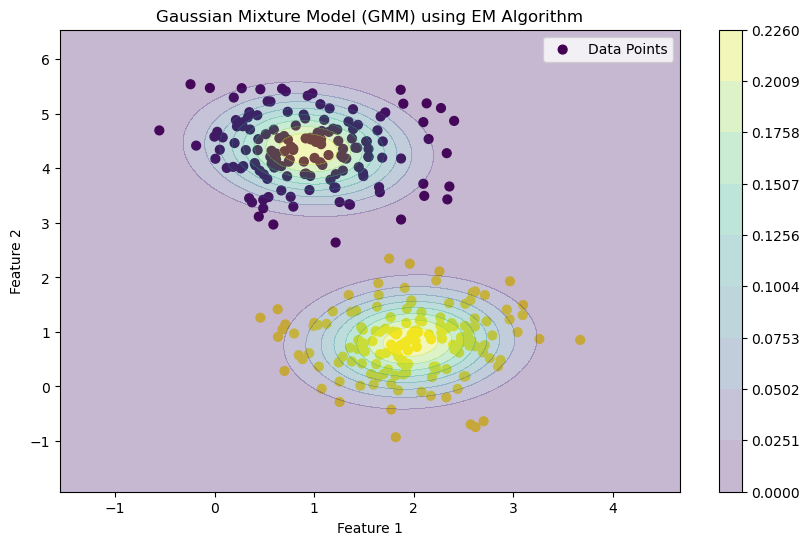

GMM Means:
[[0.94059765 4.35024404]
 [1.96664628 0.81664715]]
GMM Covariances:
[[[ 0.35997635 -0.03448896]
  [-0.03448896  0.34717404]]

 [[ 0.37092244  0.02196307]
  [ 0.02196307  0.34751918]]]
GMM Weights:
[0.49961702 0.50038298]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

np.random.seed(0)
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)

gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X)
y_pred = gmm.predict(X)

plt.figure(figsize=(10, 6))

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis', label='Data Points')

ax = plt.gca()
x = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 1000)
y = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 1000)
X_grid, Y_grid = np.meshgrid(x, y)
Z = np.stack([X_grid.ravel(), Y_grid.ravel()], axis=-1)
Z = gmm.score_samples(Z)
Z = Z.reshape(X_grid.shape)

contour = ax.contourf(X_grid, Y_grid, np.exp(Z), levels=np.linspace(0, np.max(np.exp(Z)), 10), cmap='viridis', alpha=0.3)
plt.colorbar(contour)

plt.title('Gaussian Mixture Model (GMM) using EM Algorithm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print("GMM Means:")
print(gmm.means_)
print("GMM Covariances:")
print(gmm.covariances_)
print("GMM Weights:")
print(gmm.weights_)